<a href="https://colab.research.google.com/github/poddardelhi/eda_credit_cards/blob/main/EDA_CreditCard_Customers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Credit Card Customers





In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1OsytDc8WuSktkW4tYlZXx7TUWAuXptUp')

     |████████████████████████████████| 71kB 3.1MB/s 


## Saving the notebook to JOVIAN.AI

In [114]:
project_name = "eda-creditcard" 
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/poddardelhi/eda-creditcard


'https://jovian.ai/poddardelhi/eda-creditcard'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (20,3)
from wordcloud import WordCloud , ImageColorGenerator
from pylab import *

%matplotlib inline

# Step 1: Data Profiling

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Jovian/Opera/BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Droping the last two rows
df= df.drop(df.columns[[-1,-2]], axis=1)

In [ ]:
# Checking the None values in the dataset
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Checking the duplicates
df.duplicated().sum()

0

In [ ]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [113]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
6002,712578933,Attrited Customer,35,F,5,High School,Married,$40K - $60K,Blue,25,3,2,6,1438.3,0,1438.3,0.763,2500,44,0.517,0.000,0.999000,0.001003
5510,718041033,Existing Customer,47,F,4,Graduate,Married,Less than $40K,Blue,36,6,1,4,2178.0,1455,723.0,1.001,5363,76,0.810,0.668,0.000166,0.999830
1312,708679383,Existing Customer,44,F,2,Unknown,Unknown,Less than $40K,Blue,32,5,1,3,4852.0,1777,3075.0,0.667,1775,55,1.037,0.366,0.000102,0.999900
8445,778441533,Attrited Customer,45,F,4,High School,Single,Unknown,Blue,26,6,2,2,4549.0,1631,2918.0,0.779,2240,34,0.478,0.359,0.991460,0.008540
7992,721139808,Existing Customer,42,F,3,Graduate,Single,Less than $40K,Blue,36,1,2,1,2344.0,1081,1263.0,0.619,3889,80,0.860,0.461,0.000071,0.999930
1533,779611008,Existing Customer,29,M,0,Graduate,Married,$40K - $60K,Blue,18,4,3,4,4532.0,0,4532.0,0.734,1885,55,0.528,0.000,0.000443,0.999560
3039,780000258,Existing Customer,48,M,3,Uneducated,Single,$120K +,Blue,38,4,2,5,20912.0,0,20912.0,0.725,4172,84,0.787,0.000,0.000603,0.999400
7451,758178558,Existing Customer,44,F,3,Graduate,Single,Unknown,Blue,37,3,2,1,4703.0,1555,3148.0,0.932,4127,89,0.648,0.331,0.000071,0.999930
553,778686408,Existing Customer,48,M,1,College,Married,$60K - $80K,Blue,29,4,3,2,19324.0,1040,18284.0,0.904,1744,50,0.852,0.054,0.000164,0.999840
5516,716915133,Existing Customer,42,F,2,Unknown,Single,Less than $40K,Blue,36,5,3,4,1696.0,0,1696.0,0.666,4397,70,0.628,0.000,0.000567,0.999430


# Step 2: Exploratory Data Analysis




## Q1. How many are Existing Credit Card Customers compared to Attrited Customers?

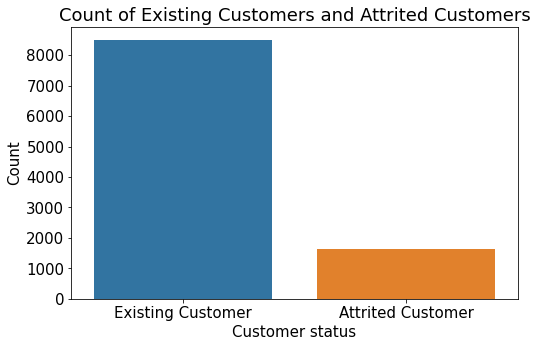

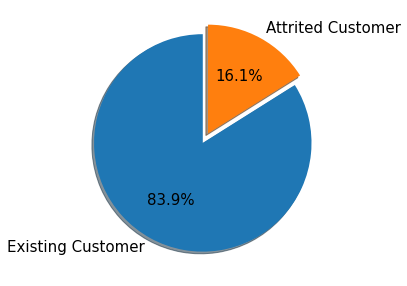

In [ ]:
df_attrited= df['Attrition_Flag'].value_counts().reset_index()
df_attrited.columns=['Customer status','Count']
df_attrited['Percentage']= (df_attrited['Count']/df_attrited['Count'].sum()) * 100
df_attrited

#bar plot
plt.figure(figsize=(8,5))
plt.title('Count of Existing Customers and Attrited Customers')
sns.barplot(x=df_attrited['Customer status'],y=df_attrited['Count'])
plt.show


Customer_status = ['Existing Customer','Attrited Customer']

fig, ax = plt.subplots(figsize=(8,5))
explode = (0, 0.1)
ax.pie(df_attrited['Count'], explode=explode,
       labels=df_attrited['Customer status'], 
        autopct='%1.1f%%',
        shadow=True, startangle=90)
fig.show()

The above analysis describes the following conclusions:


*   Out of all the creditcard service users, there are 8500 users who're still client with the company and 1627 have already unsubscribed the service.
*   Attrition Customer percentage is 16.1% and Existing Customers are 83.9%





## Q2. What are the age groups of customers who're using the credit cards?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Customer Age')

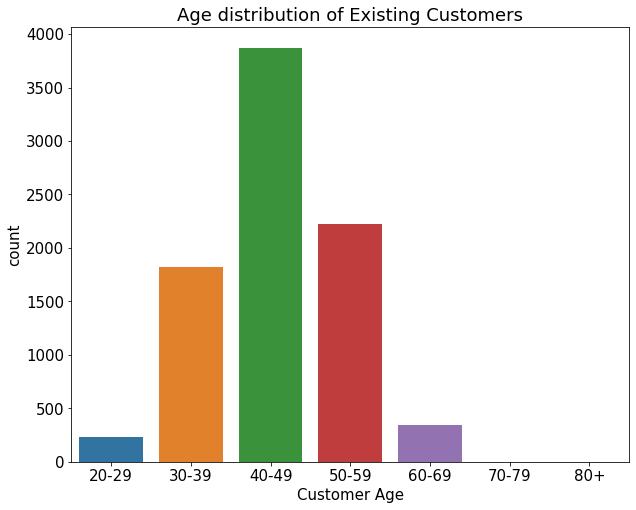

In [ ]:
df_existingCustomer= df.loc[df['Attrition_Flag']=='Existing Customer']
bins= [20,30,40,50,60,70,80,90]
labels=['20-29','30-39','40-49','50-59','60-69','70-79','80+']
age=pd.cut(df_existingCustomer['Customer_Age'],bins,labels=labels,include_lowest=True)

plt.figure(figsize=(10,8))
sns.countplot(age)
plt.title('Age distribution of Existing Customers')

plt.xlabel('Customer Age')

In [ ]:
df_existingCustomer_gen= df_existingCustomer['Gender'].value_counts().reset_index()
df_existingCustomer_gen



,index,Gender
0,F,4428
1,M,4072




*   The analysis shows that the age group of 40-49 have the highest number of credit card users.


*   Out of all the existing credit card users 4428 are Females and 4072 are Males






/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Customer Age')

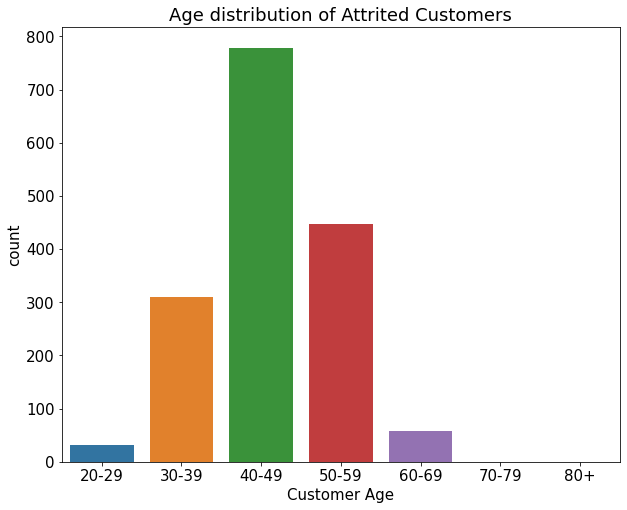

In [ ]:
df_attritedCustomer= df.loc[df['Attrition_Flag']=='Attrited Customer']
bins= [20,30,40,50,60,70,80,90]
labels=['20-29','30-39','40-49','50-59','60-69','70-79','80+']
age=pd.cut(df_attritedCustomer['Customer_Age'],bins,labels=labels,include_lowest=True)

plt.figure(figsize=(10,8))
sns.countplot(age)
plt.title('Age distribution of Attrited Customers')

plt.xlabel('Customer Age')

In [ ]:
df_attritedCustomer_gen= df_attritedCustomer['Gender'].value_counts().reset_index()
df_attritedCustomer_gen

,index,Gender
0,F,930
1,M,697


* The analysis shows that the age group of 40-49 have the highest number of attrited customer.

*  Out of the customer who unsubscribed to credit card: 930 were Females and 697 were Males




## Q3. What is proportion of Customer?

In [ ]:
plt.figure(figsize=(8,5))
px.pie(df,names='Gender',title=" Customer Distribution By Gender",width=800, height=500)


<Figure size 576x360 with 0 Axes>

* Percentage of Female users are slightly more than Male users

## Q4. Distribution of customers based on Education Level

In [ ]:
px.pie(df,names='Education_Level', title='Distribution of Customers based on Education Level',width=800, height=500)

The above figure shows most of the credit card service users are Graduate Level

## Q5.1 What is the proportion of different income levels of **existing** customer?

In [ ]:

px.pie(df_existingCustomer,names='Income_Category', title='Proportion of different income levels of exixting customer',width=800, height=500)

* The above figure shows that most of the existing customers are having income less than $40,000 annualy

## Q5.2 What is the proportion of income of customers who left?




In [ ]:
px.pie(df_attritedCustomer,names='Income_Category', title='Proportion of different income levels of attrited customer ',width=800, height=500)

The above figure shows that most of attrited customer belonged to the income group of 40K or less

## Q6. Distribution of existing customers based on card category

In [ ]:
px.pie(df_existingCustomer,names='Card_Category', title='Proportion of exiting customer based on card category',width=800, height=500)

## Q6.2 Distribution of attributed customers based on card category

In [ ]:
px.pie(df_attritedCustomer,names='Card_Category', title='Proportion of attrited customer based on card category',width=800, height=500)

## Q7. Distribution of credit limit

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



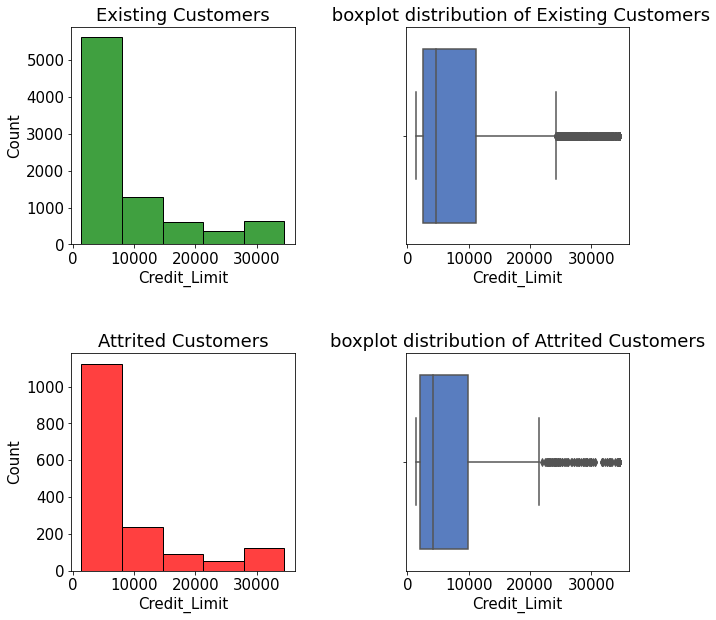

*******EXISTING CUSTOMERS CREDIT LIMIT********

count     8500.000000
mean      8726.877518
std       9084.969807
min       1438.300000
25%       2602.000000
50%       4643.500000
75%      11252.750000
max      34516.000000
Name: Credit_Limit, dtype: float64
*******ATTRIATED CUSTOMERS CREDIT LIMIT********

count     1627.000000
mean      8136.039459
std       9095.334105
min       1438.300000
25%       2114.000000
50%       4178.000000
75%       9933.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


In [111]:
fig, ax= plt.subplots(2,2,figsize=(10,10))
sns.histplot(df_existingCustomer.Credit_Limit,bins=5,color='green',kde=False,ax=ax[0,0]);
sns.boxplot(df_existingCustomer.Credit_Limit,palette='muted',ax=ax[0,1]);
sns.histplot(df_attritedCustomer.Credit_Limit,bins=5,color='red',kde=False,ax=ax[1,0]);
sns.boxplot(df_attritedCustomer.Credit_Limit,palette='muted',ax=ax[1,1]);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5);
ax[0,0].set_title("Existing Customers");
ax[0,1].set_title(" boxplot distribution of Existing Customers");
ax[1,0].set_title("Attrited Customers");
ax[1,1].set_title("boxplot distribution of Attrited Customers");
plt.show();


print('*******EXISTING CUSTOMERS CREDIT LIMIT********\n')
print(df_existingCustomer.Credit_Limit.describe())
print('*******ATTRIATED CUSTOMERS CREDIT LIMIT********\n')
print(df_attritedCustomer.Credit_Limit.describe())

The above figure provides the details of credit limit of existing and attriated customers. Following conclusion can be drawn:


*  The average credit limit of existing customers is 8726.87 and the median is 4643.50
*  The average credit limit of atrited customers is 8136 and the median is 4178

